<a href="https://colab.research.google.com/github/BAEK-SEUNGYUN/modu_deep/blob/main/nlp_3%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bag of words(BOW)

1. 통계와 머신러닝을 활용한 방법
2. 인공 신경망을 활용한 방법

doc1 = 'John likes to watch movies. Mary likes movies too.'  
BoW1 = {"John":1, "likes":2, "to":1, "watch":1, "movies":2, "Mary":1, "too":1}


doc2 = 'Mary also likes to watch football games.'  
BoW2 = {"Mary":1, "also":1, "likes":1, "to":1, "watch":1, "football":1, "games":1}

doc3 = 'John likes to watch movies. Mary likes movies too. Mary also likes to watch football games.'  
BoW3 = {"John":1, "likes":3, "to":2, "watch":2, "movies":2, "Mary":2, "too":1, "also":1, "football":1, "games":1};

'John likes to watch movies. Mary likes movies too.'
'Mary also likes to watch football games.'  
'John likes to watch movies. Mary likes movies too. Mary also likes to watch football games.' 


## keras Tokenizer를 활용한 BOW

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
sentence = ['John likes to watch movies. Mary likes movies too. Mary also likes to watch football games.']

In [ ]:
def print_bow(sentence):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(sentence)        # 단어장 생성 ( 중복을 제거한 단어들 -> 단어장 )
  bow = dict(tokenizer.word_counts)       # 각 단어와 각 단어의 빈도를 bow에 저장
  print("Bag of words : ", bow)           # bow 출력
  print("단어장(vocabulary) 의 크기 : ", len(tokenizer.word_counts))  # 중복을 제거한 단어들의 갯수

print_bow(sentence)


Bag of words :  {'john': 1, 'likes': 3, 'to': 2, 'watch': 2, 'movies': 2, 'mary': 2, 'too': 1, 'also': 1, 'football': 1, 'games': 1}
단어장(vocabulary) 의 크기 :  10


##scikit-learn CountVectorizer 활용한 BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sentence = ['John likes to watch movies. Mary likes movies too. Mary also likes to watch football games.']

In [ ]:
vector = CountVectorizer()
print('Bag of Words : ', vector.fit_transform(sentence).toarray())  # 코퍼스로부터 각 단어의 빈도수를 기록
print('각 단어의 인덱스 : ', vector.vocabulary_)    # 각 단어의 ㅇ니덱스가 어떻게 부여되는지를 보여줌.

Bag of Words :  [[1 1 1 1 3 2 2 2 1 2]]
각 단어의 인덱스 :  {'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


In [ ]:
print('단어장(vocabulary) 의 크기 : ', len(vector.vocabulary_))

단어장(vocabulary) 의 크기 :  10


## DTM(Document-Term Matrix)


문서 1 : I like dog  
문서 2 : I like cat  
문서 3 : I like cat I like cat


In [ ]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

# 코사인 유사도 함수
def cos_sim(A,B):
  return dot(A,B)/(norm(A)*norm(B))

In [ ]:
print(cos_sim(doc1, doc2))
print(cos_sim(doc1, doc3))
print(cos_sim(doc2, doc3))

0.6666666666666667
0.6666666666666667
1.0000000000000002


DTM 에서는 코사인 유사도는 0이상 1이하의 값을 가지고, 값이 1에 가까울수록 유사도 높다 판단

## scikit-learn CountVectorizer 활용한 DTM 구현

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
          'John likes to watch movies',
          'Mary likes movies too',
          'Mary also likes to watch football games',
]

vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지 보여준다.

[[0 0 0 1 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 1 0 1]]
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
corpus = [
          'John likes to watch movies. Mary likes movies too.',
          'Mary also likes to watch football games.',
          'John likes to watch movies. Mary likes movies too. Mary also likes to watch football games.'
]

In [ ]:
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.vocabulary_)  # 각 단어의 인덱스가 어떻게 부여되었는지 보여준다.

[[0 0 0 1 2 1 2 1 1 1]
 [1 1 1 0 1 1 0 1 0 1]
 [1 1 1 1 3 2 2 2 1 2]]
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


## TF-IDF

모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단하는것

단어의 빈도, 문서의 빈도의 역수

In [ ]:
from math import log
import pandas as pd

docs = [
        'John likes to watch movies and Mary likes movies too',
        'James likes to watch TV',
        'Mary also likes to watch football games',
]

In [ ]:
# 단어장
vocab = list(set(w for doc in docs for w in doc.split())) # 중복을 제거하며 단어장을 만듦
vocab.sort()
print('단어장의 크기 : ', len(vocab))
print(vocab)

단어장의 크기 :  13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


In [ ]:
N = len(docs)
print(N)

3


In [ ]:
def tf(t,d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df + 1))+1

def tfidf(t, d):
  return tf(t,d)* idf(t)

TF 함수를 사용해서 DTM을 만들어보자

In [ ]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]

    result[-1].append(tf(t,d))

tf_ = pd.DataFrame(result, columns=vocab)
tf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0,1,1,0,0,1,0,0,2,2,2,1,1
1,1,0,0,1,0,0,0,0,1,0,1,0,1
2,0,0,1,0,1,0,1,1,1,0,1,0,1


In [ ]:
result = []
for j in range(len(vocab)):
  t = vocab[j]
  result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
James,1.405465
John,1.405465
Mary,1.000000
TV,1.405465
also,1.405465
and,1.405465
football,1.405465
games,1.405465
likes,0.712318
movies,1.405465


TF-IDF 행렬을 출력 DTM 에 있는 각 단어의 TF에 각 단어의 IDF 를 곱해준 값

In [ ]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]

    result[-1].append(tfidf(t,d))

tf_ = pd.DataFrame(result, columns=vocab)
tf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0.000000,1.405465,1.0,0.000000,0.000000,1.405465,0.000000,0.000000,1.424636,2.81093,1.424636,1.405465,0.712318
1,1.405465,0.000000,0.0,1.405465,0.000000,0.000000,0.000000,0.000000,0.712318,0.00000,0.712318,0.000000,0.712318
2,0.000000,0.000000,1.0,0.000000,1.405465,0.000000,1.405465,1.405465,0.712318,0.00000,0.712318,0.000000,0.712318


In [ ]:
 '''
        'John likes to watch movies and Mary likes movies too',
        'James likes to watch TV',
        'Mary also likes to watch football games',
'''

"\n       'John likes to watch movies and Mary likes movies too',\n       'James likes to watch TV',\n       'Mary also likes to watch football games',\n"

## scikit-learn TFidfVectorizer 활용

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
corpus = [
        'John likes to watch movies and Mary likes movies too',
        'James likes to watch TV',
        'Mary also likes to watch football games',
]

In [ ]:
tfidfv = TfidfVectorizer().fit(corpus)
vocab = list(set(tfidfv.vocabulary_.keys()))
vocab.sort()

tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns = vocab)
tfidf_

,also,and,football,games,james,john,likes,mary,movies,to,too,tv,watch
0,0.000000,0.321556,0.000000,0.000000,0.000000,0.321556,0.379832,0.244551,0.643111,0.189916,0.321556,0.000000,0.189916
1,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000,0.000000,0.338381,0.000000,0.572929,0.338381
2,0.464997,0.000000,0.464997,0.464997,0.000000,0.000000,0.274634,0.353642,0.000000,0.274634,0.000000,0.000000,0.274634


LSA(잠재의 미분석)

전체 코퍼스에서 문자속 단어들 상의 관계를 찾아내는 자연어 처피 정보검색 기술

단어와 단어사이, 문서와 문서사이, 단어와 문서사이의 의미적 유사성 점수를 찾아낸다.


In [ ]:
import pandas as pd
import numpy as np
import urllib.request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv",
                           filename="/content/abcnews-data-text.csv")


('/content/abcnews-data-text.csv', <http.client.HTTPMessage at 0x7fbb56b60d50>)

In [ ]:
data = pd.read_csv('/content/abcnews-data-text.csv', error_bad_lines=False)
data

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1082163,20170630,when is it ok to compliment a womans smile a g...
1082164,20170630,white house defends trumps tweet
1082165,20170630,winter closes in on tasmania as snow ice falls
1082166,20170630,womens world cup australia wins despite atapat...


In [ ]:
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
text = data[['headline_text']]
text.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [ ]:
text.nunique()

headline_text    1054983
dtype: int64

In [ ]:
# 중복제거
text.drop_duplicates(inplace=True)
text = text.reset_index(drop=True)
print(len(text))

1054983


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


데이터 정제 및 정규화

In [ ]:
text['headline_text'] = text.apply(lambda row:nltk.word_tokenize(row['headline_text']), axis=1)

In [ ]:
# 불용어 제거
stop_words = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop_words) ])

In [ ]:
text.head()

,headline_text
0,"[aba, decides, community, broadcasting, licence]"
1,"[act, fire, witnesses, must, aware, defamation]"
2,"[g, calls, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


In [ ]:
# 단어 정규화 과정 길이가 1~2 인 단어는 제거하는 전처리
# 단어 정규화 3인칭 단수 표현 -> 1인칭 변환, 과거형 동사 -> 현재형 동사등을 수행
text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

In [ ]:
# 길이가 1~2 인 단어를 제거
text = text['headline_text'].apply(lambda x : [word for word in x if len(word) > 2])
print(text[:5])

0     [aba, decide, community, broadcast, licence]
1    [act, fire, witness, must, aware, defamation]
2       [call, infrastructure, protection, summit]
3            [air, staff, aust, strike, pay, rise]
4    [air, strike, affect, australian, travellers]
Name: headline_text, dtype: object


In [ ]:
# 역토근화 ( 토큰화 작업을 역으로 수행 )
detokenized_doc = []
for i in range(len(text)):
  t = ' '.join(text[i])
  detokenized_doc.append(t)

train_data = detokenized_doc

In [ ]:
train_data[:5]

['aba decide community broadcast licence',
 'act fire witness must aware defamation',
 'call infrastructure protection summit',
 'air staff aust strike pay rise',
 'air strike affect australian travellers']

In [ ]:
# 상위  5000갸의 단어만 사용
c_vectorizer = CountVectorizer(stop_words='english', max_features = 5000)
document_term_matrix = c_vectorizer.fit_transform(train_data)

In [ ]:
# DTM의 크기
print('행렬의 크기 : ', document_term_matrix.shape) # 문서의 수 X 단어 집합의 크기

행렬의 크기 :  (1054983, 5000)


## scikitl-learn TruncatedSVD 활용

In [ ]:
from sklearn.decomposition import TruncatedSVD

n_topics = 10
lsa_model = TruncatedSVD(n_components = n_topics)
lsa_model.fit_transform(document_term_matrix)

array([[ 1.20456388e-02, -3.65875120e-03,  1.82588534e-02, ...,
         4.48455591e-03, -4.68985119e-03,  1.49264870e-02],
       [ 2.89653063e-02, -1.09225040e-02,  1.82023710e-02, ...,
        -2.34389766e-03, -8.75592116e-03,  8.29185754e-04],
       [ 5.05593591e-03, -1.99480648e-03,  9.74764195e-03, ...,
        -2.25188185e-03, -8.22812521e-04,  3.92130399e-03],
       ...,
       [ 2.96586176e-02,  3.63809939e-03,  2.53667850e-02, ...,
         3.48820384e-02,  1.11100690e-02, -7.07169109e-04],
       [ 6.11788358e-02, -6.60367488e-03,  1.37563862e-01, ...,
         1.00802146e+00,  9.03681331e-01, -2.04264157e-01],
       [ 7.20060503e-02,  2.62228815e-02,  1.53681033e-03, ...,
         9.43964946e-03, -5.20721307e-02, -4.20345954e-02]])

In [ ]:
print(np.shape(lsa_model.components_))

(10, 5000)


In [ ]:
terms = c_vectorizer.get_feature_names()

def get_topics(components, get_feature_names, n = 5):
  for idx, topic in enumerate(components):
    print("Topic %d : " % (idx+1), [(get_feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])

In [ ]:
get_topics(lsa_model.components_, terms)

Topic 1 :  [('police', 0.74633), ('man', 0.4534), ('charge', 0.21129), ('new', 0.14088), ('court', 0.11144)]
Topic 2 :  [('man', 0.69409), ('charge', 0.30066), ('court', 0.16758), ('face', 0.11445), ('murder', 0.10632)]
Topic 3 :  [('new', 0.83658), ('plan', 0.23673), ('say', 0.18274), ('govt', 0.11075), ('council', 0.10922)]
Topic 4 :  [('say', 0.73918), ('plan', 0.35804), ('govt', 0.16777), ('council', 0.13004), ('urge', 0.07555)]
Topic 5 :  [('plan', 0.7297), ('council', 0.18278), ('govt', 0.14778), ('urge', 0.07657), ('water', 0.06919)]
Topic 6 :  [('govt', 0.5275), ('urge', 0.27429), ('court', 0.26794), ('fund', 0.223), ('win', 0.15708)]
Topic 7 :  [('court', 0.49457), ('charge', 0.4466), ('face', 0.40844), ('plan', 0.12701), ('murder', 0.1228)]
Topic 8 :  [('win', 0.64252), ('court', 0.31793), ('kill', 0.19193), ('crash', 0.1165), ('australia', 0.11144)]
Topic 9 :  [('win', 0.60981), ('charge', 0.46149), ('cup', 0.1017), ('world', 0.09565), ('govt', 0.07105)]
Topic 10 :  [('counc

## TF-IDF 행렬 생성

In [ ]:
# 상위 5000개의 단어만 사용
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features= 5000)
tf_idf_matrix = tfidf_vectorizer.fit_transform(train_data)

In [ ]:
# TF-IDF 행렬의 크기를 확인
print("행렬의 크기 : ", tf_idf_matrix.shape)

행렬의 크기 :  (1054983, 5000)


## scikit-learn LDA model 활용

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
lda_model = LatentDirichletAllocation(n_components = 10, learning_method='online', random_state=777, max_iter=1)
lda_model.fit_transform(tf_idf_matrix)

array([[0.0335099 , 0.0335099 , 0.0335099 , ..., 0.17024867, 0.0335099 ,
        0.0335099 ],
       [0.03365631, 0.03365631, 0.03365631, ..., 0.03365631, 0.03365631,
        0.03365631],
       [0.25184095, 0.0366096 , 0.0366096 , ..., 0.0366096 , 0.0366096 ,
        0.0366096 ],
       ...,
       [0.26687206, 0.02914502, 0.02914502, ..., 0.13007484, 0.02916018,
        0.28739608],
       [0.10378115, 0.02637829, 0.12325014, ..., 0.02637829, 0.02637829,
        0.02637829],
       [0.03376055, 0.03376055, 0.2255442 , ..., 0.03376055, 0.03376055,
        0.03376055]])

In [ ]:
print(np.shape(lda_model.components_))

(10, 5000)


In [ ]:
# LDA의 결과 토픽과 각 단어의 비중을 출력하자
def get_topics(components, feature_names, n=5):
  for idx, topic in enumerate(components):
    print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])

In [ ]:
get_topics(lda_model.components_, terms)

Topic 1: [('australia', 9359.06334), ('sydney', 5854.97288), ('attack', 4784.76322), ('change', 4193.63035), ('year', 3924.88997)]
Topic 2: [('government', 6344.07413), ('charge', 5947.12292), ('man', 4519.7974), ('state', 3658.16422), ('live', 3625.10473)]
Topic 3: [('australian', 7666.65651), ('say', 7561.01807), ('police', 5513.22932), ('home', 4048.38409), ('report', 3796.04446)]
Topic 4: [('melbourne', 5298.35047), ('south', 4844.59835), ('death', 4281.78433), ('china', 3214.44581), ('women', 3029.28443)]
Topic 5: [('win', 5704.0914), ('canberra', 4322.0963), ('die', 4025.63057), ('open', 3771.65243), ('warn', 3577.47151)]
Topic 6: [('court', 5246.3124), ('world', 4536.86331), ('country', 4166.34794), ('woman', 3983.97748), ('crash', 3793.50267)]
Topic 7: [('election', 5418.5038), ('adelaide', 4864.95604), ('house', 4478.6135), ('school', 3966.82676), ('2016', 3955.11155)]
Topic 8: [('trump', 8189.58575), ('new', 6625.2724), ('north', 3705.40987), ('rural', 3521.42659), ('donald',

In [ ]:
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##영어 실습

In [ ]:
from nltk.corpus import abc

corpus = abc.sents()

print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [ ]:
print('코퍼스의 크기 : ', len(corpus))

코퍼스의 크기 :  29059


In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = corpus, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
model_result = model.wv.most_similar("man")

In [ ]:
print(model_result)

[('woman', 0.932591438293457), ('Bang', 0.9208115339279175), ('third', 0.9197713136672974), ('asteroid', 0.9184229373931885), ('skull', 0.9162983894348145), ('rally', 0.9132448434829712), ('conviction', 0.9073635935783386), ('infant', 0.9052354693412781), ('dog', 0.9031487703323364), ('baby', 0.9016126394271851)]


In [ ]:
from gensim.models import KeyedVectors

model.wv.save_word2vec_format('./w2v')
loaded_model = KeyedVectors.load_word2vec_format("./w2v")
print("모델 load 완료")

모델 load 완료


In [ ]:
model_result = loaded_model.wv.most_similar("man")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
print(model_result)

[('woman', 0.932591438293457), ('Bang', 0.9208115339279175), ('third', 0.9197713136672974), ('asteroid', 0.9184229373931885), ('skull', 0.9162983894348145), ('rally', 0.9132448434829712), ('conviction', 0.9073635935783386), ('infant', 0.9052354693412781), ('dog', 0.9031487703323364), ('baby', 0.9016126394271851)]


In [ ]:
loaded_model.most_similar('apple')

[('Cattle', 0.977625846862793),
 ('pear', 0.9734073877334595),
 ('chicken', 0.9670250415802002),
 ('fishermen', 0.9637752771377563),
 ('banana', 0.9617539644241333),
 ('Quarantine', 0.9615695476531982),
 ('Table', 0.9604662656784058),
 ('Kangaroo', 0.9595195055007935),
 ('cherry', 0.9594022035598755),
 ('Desert', 0.9591866731643677)]

In [ ]:
loaded_model.most_similar('memory')

[('springs', 0.9725330471992493),
 ('jolt', 0.9717246294021606),
 ('structures', 0.9714362025260925),
 ('infection', 0.9696650505065918),
 ('polymer', 0.968430757522583),
 ('lifting', 0.9679393768310547),
 ('chasing', 0.96783447265625),
 ('broad', 0.967667818069458),
 ('semen', 0.9675707817077637),
 ('protective', 0.9675543308258057)]

In [ ]:
loaded_model.most_similar('memorry') # 단어장에 없는단어라서 에러가 난다.

KeyError: ignored

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 14.7MB/s 
     |████████████████████████████████| 450kB 47.7MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


## 한글실습

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
# 네이버 영화 리뷰

('ratings.txt', <http.client.HTTPMessage at 0x7f43a0875690>)

In [ ]:
train_data = pd.read_table('ratings.txt')

In [ ]:
train_data[:5]      # label 긍정적 = 1, 부정적 = 0

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
print(len(train_data)) # 리뷰 개수

200000


In [ ]:
print(train_data.isnull().values.any()) # 결측치가 있는지 확인

True


In [ ]:
train_data = train_data.dropna(how='any') # 결측치 제거
print(train_data.isnull().values.any())

False


In [ ]:
print(len(train_data)) # 8개의 결측치 삭제

199992


In [ ]:
# 졍규표현식으로 한글외의 문자를 제거

train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]","")

#  '/^[ㄱ-ㅎ|가-힣|a-z|A-Z|0-9|]+$/'  /^[가-힣]+$/

In [ ]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [ ]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
# 오래걸림 거의 10분
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
  temp_x = okt.morphs(sentence, stem=True)
  temp_x = [word for word in temp_x if not word in stopwords]
  tokenized_data.append(temp_x)

리뷰의 최대길이 :  72
리뷰의 평균길이 :  10.716703668146726


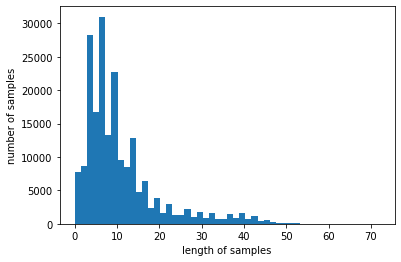

In [ ]:
# 리뷰 길이 분포 확인
print("리뷰의 최대길이 : ", max(len(l) for l in tokenized_data))
print("리뷰의 평균길이 : ", sum(map(len,tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
model.wv.vectors.shape

(16477, 100)

In [ ]:
print(model.wv.most_similar('최민식'))

[('안성기', 0.8890868425369263), ('박중훈', 0.8551244735717773), ('한석규', 0.8531733751296997), ('김명민', 0.8422225117683411), ('임원희', 0.8406882882118225), ('이정재', 0.8387984037399292), ('공리', 0.8371419310569763), ('주진모', 0.8358902931213379), ('클로즈', 0.8349424600601196), ('송강호', 0.8324154615402222)]


In [ ]:
print(model.wv.most_similar('히어로'))

[('슬래셔', 0.8513182401657104), ('무협', 0.8455272316932678), ('호러', 0.8413910269737244), ('느와르', 0.8320450782775879), ('무비', 0.8250951766967773), ('물의', 0.8238587379455566), ('블랙', 0.8192233443260193), ('물', 0.8158296942710876), ('블록버스터', 0.8088275194168091), ('멜로', 0.8082695603370667)]


In [ ]:
print(model.wv.most_similar('아이언맨'))

[('한국판', 0.83139967918396), ('스타워즈', 0.8231571912765503), ('어벤져스', 0.8097554445266724), ('반지의제왕', 0.8082922697067261), ('패스트', 0.805370569229126), ('옹박', 0.8049256801605225), ('주온', 0.7980425357818604), ('라이즈', 0.7978197336196899), ('원피스', 0.7969386577606201), ('다이하드', 0.7966196537017822)]


## 사전 훈련된 워드 임배딩

In [ ]:
# 드라이브 마운트해서 경로를 가져옴
import gensim
model = gensim.models.Word2Vec.load('/content/drive/MyDrive/dataset/ko.bin')

In [ ]:
result = model.wv.most_similar('강아지')
print(result)

[('고양이', 0.7290452718734741), ('거위', 0.7185635566711426), ('토끼', 0.7056223154067993), ('멧돼지', 0.6950401067733765), ('엄마', 0.6934334635734558), ('난쟁이', 0.6806551218032837), ('한마리', 0.6770296096801758), ('아가씨', 0.6750352382659912), ('아빠', 0.6729634404182434), ('목걸이', 0.6512460708618164)]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1,0,0,1,1,0,1] # 긍정 = 1 , 부정 = 0

In [ ]:
# 토큰화
t = Tokenizer()
t.fit_on_texts(sentences)
vocab_size = len(t.word_index) + 1

print(vocab_size)

16


In [ ]:
# 인코딩
x_encoded = t.texts_to_sequences(sentences)
print(x_encoded)

[[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [ ]:
max_len = max(len(l) for l in x_encoded)
print(max_len)

4


In [ ]:
# Padding
x_train = pad_sequences(x_encoded, maxlen=max_len, padding = 'post')
y_train = np.array(y_train)
print(x_train)

[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(vocab_size, 4, input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 4, 4)              64        
_________________________________________________________________
flatten (Flatten)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss = 'binary_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=100, verbose = 2)

Epoch 1/100
1/1 - 1s - loss: 0.6991 - acc: 0.4286
Epoch 2/100
1/1 - 0s - loss: 0.6980 - acc: 0.4286
Epoch 3/100
1/1 - 0s - loss: 0.6969 - acc: 0.4286
Epoch 4/100
1/1 - 0s - loss: 0.6958 - acc: 0.4286
Epoch 5/100
1/1 - 0s - loss: 0.6947 - acc: 0.4286
Epoch 6/100
1/1 - 0s - loss: 0.6936 - acc: 0.4286
Epoch 7/100
1/1 - 0s - loss: 0.6926 - acc: 0.4286
Epoch 8/100
1/1 - 0s - loss: 0.6915 - acc: 0.4286
Epoch 9/100
1/1 - 0s - loss: 0.6904 - acc: 0.4286
Epoch 10/100
1/1 - 0s - loss: 0.6894 - acc: 0.4286
Epoch 11/100
1/1 - 0s - loss: 0.6883 - acc: 0.4286
Epoch 12/100
1/1 - 0s - loss: 0.6873 - acc: 0.4286
Epoch 13/100
1/1 - 0s - loss: 0.6862 - acc: 0.4286
Epoch 14/100
1/1 - 0s - loss: 0.6852 - acc: 0.4286
Epoch 15/100
1/1 - 0s - loss: 0.6841 - acc: 0.4286
Epoch 16/100
1/1 - 0s - loss: 0.6830 - acc: 0.5714
Epoch 17/100
1/1 - 0s - loss: 0.6820 - acc: 0.5714
Epoch 18/100
1/1 - 0s - loss: 0.6809 - acc: 0.5714
Epoch 19/100
1/1 - 0s - loss: 0.6798 - acc: 0.5714
Epoch 20/100
1/1 - 0s - loss: 0.6787 - a

https://colab.research.google.com/drive/1dj7HqTOOMcM8D-5Clxw07ibJDSWTscR7#scrollTo=YBXA87Td9v0d